In [1]:
def makeAll(name):
    
    import warnings
    warnings.filterwarnings(action='ignore') 
    import nbimporter
    import upload
    import STT
    import emo_recog
    import emograph
    import stargraph
    import wordGraph
    import makeDir
    import videoProcessing
    import voicegraph
    import eyeblinkmovie
    import time
    import textview
    from datetime import datetime
    now = datetime.now()
        

    sourcepath = "data/"+name+".mp4"#소스파일 저장경로 지정
    gcipath = "data/"+name+".wav"
    bucket = "thirdproj"
    date = str(now.year)+str(now.month)+str(now.day)
    filepath = "result/"+name+date+"/"+name+".wav"
    filepath2 = "result/"+name+date+"/"+name+"44100.wav"
    
    makeDir.createFolder('result/'+name+date)
    
    videoProcessing.videoEdit16000(sourcepath,filepath)
    videoProcessing.videoEdit44100(sourcepath,filepath2)
    
    upload.upload_blob(bucket,filepath,gcipath)
    
    time.sleep(2)
    try:
        stt = STT.transcribe_gcs_with_word_time_offsets("gs://"+bucket+"/"+gcipath)
    except:
        stt = STT.transcribe_gcs_with_word_time_offsets("gs://"+bucket+"/"+gcipath)
    
    time.sleep(2)
    try:
        emo = emo_recog.sttemo(filepath)
    except:
        emo = emo_recog.sttemo(filepath)
    
    emograph.graph(stt,emo,filepath,name,date)
    
    stargraph.makestar(stt,name,date)
    
    wordGraph.makeWordCloud(stt,name,date)
    
    voicegraph.makevoicegraph(filepath2,name,date,stt)
    
    eyeblinkmovie.makeeye(sourcepath,name,date,stt)
    
    textview.maketext(stt,name,date)

Importing Jupyter notebook from upload.ipynb
Importing Jupyter notebook from STT.ipynb
Importing Jupyter notebook from emo_recog.ipynb
Importing Jupyter notebook from emograph.ipynb
Importing Jupyter notebook from stargraph.ipynb
Importing Jupyter notebook from wordGraph.ipynb
Importing Jupyter notebook from makeDir.ipynb
Importing Jupyter notebook from videoProcessing.ipynb
Importing Jupyter notebook from voicegraph.ipynb
Importing Jupyter notebook from eyeblinkmovie.ipynb
Importing Jupyter notebook from textview.ipynb
Folder Created
pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
MoviePy - Writing audio in result/김미선20191030/김미선.wav


MoviePy - Done.
MoviePy - Writing audio in result/김미선20191030/김미선44100.wav


MoviePy - Done.
File result/김미선20191030/김미선.wav uploaded to data/김미선.wav.
STT complished
emo complished
emograph saved in result/김미선20191030/김미선20191030emo.png


Using TensorFlow backend.



stargraph saved in result/김미선20191030/star.jpg
IT워드클라우드.jpg is moved in result/김미선20191030
IT빈도.png is moved in result/김미선20191030
wordcloud saved in result/김미선20191030/wordcloud.jpg


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


voicegraph saved in result/김미선20191030/김미선20191030voice.png



1401 720 404 24.0
eye graph saved in result/김미선20191030/김미선20191030eyegraph.png
textview saved in result/김미선20191030/김미선20191030text.png


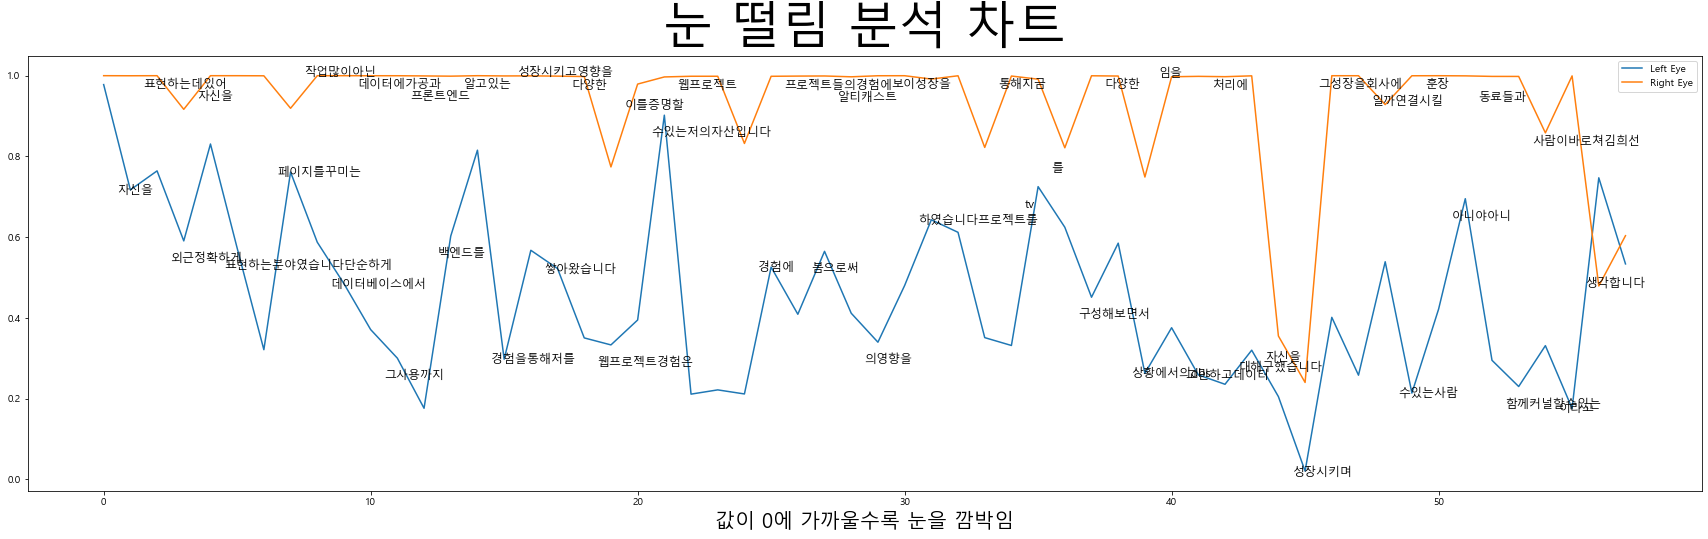

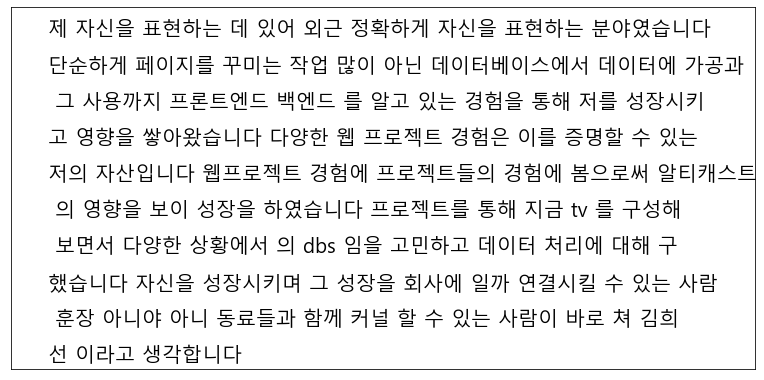

In [3]:
makeAll('jinwoo0766')